# Reference cell selection
Here, we select cells using the data-driven cell selection algorithm for scRNA-seq and scATAC-seq data. Besides, we select a set of 75 reference cells using an interactive figure widget.

## 1. Set up the notebook

In [39]:
import os
import numpy as np
import matplotlib.pyplot as plt
from SEMITONES import cell_selection as csel
from sklearn.metrics.pairwise import pairwise_kernels

plt.rcParams["axes.facecolor"] = "black"
plt.rcParams["figure.facecolor"] = "black"

In [7]:
os.chdir("../data/processed/")

In [8]:
class scdata(object):
    def __init__(self, name=None):
        self.name = name

## 2. Load the data
UMAPs for visualization and 25D and 35D UMAPs for cell selection

In [9]:
scRNA = scdata("scRNA")
scRNA.umap = np.load("greenleaf_scRNA_combined_umap.npy")

In [10]:
scATAC = scdata("scATAC")
scATAC.umap = np.load("greenleaf_scATAC_filtered_umap.npy")

In [8]:
scRNA.umap25 = np.load("greenleaf_scRNA_combined_umap25.npy")

In [32]:
scATAC.umap35 = np.load("greenleaf_scATAC_filtered_umap35.npy")

## 3. Select cells from scRNA-seq

First, let the starting cell be the least similar cell to the rest of the population

In [21]:
S = pairwise_kernels(scRNA.umap25, metric="rbf", **{"gamma": 0.08})
start = np.argmin(np.sum(S, axis=0))

Obtain 75 dissimilar cells based on the RBF-kernel similarity in the 25D UMAP space.

In [22]:
scRNA.knn_selected = csel.from_knn_dist(scRNA.umap25, start=start, n_ret=75,
                                        metric="rbf",
                                        seed=42, metric_params={"gamma": 0.8})

Plot the selected cells for a brief inspection

/home/hvlot/miniconda3/envs/hcv1/lib/python3.6/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



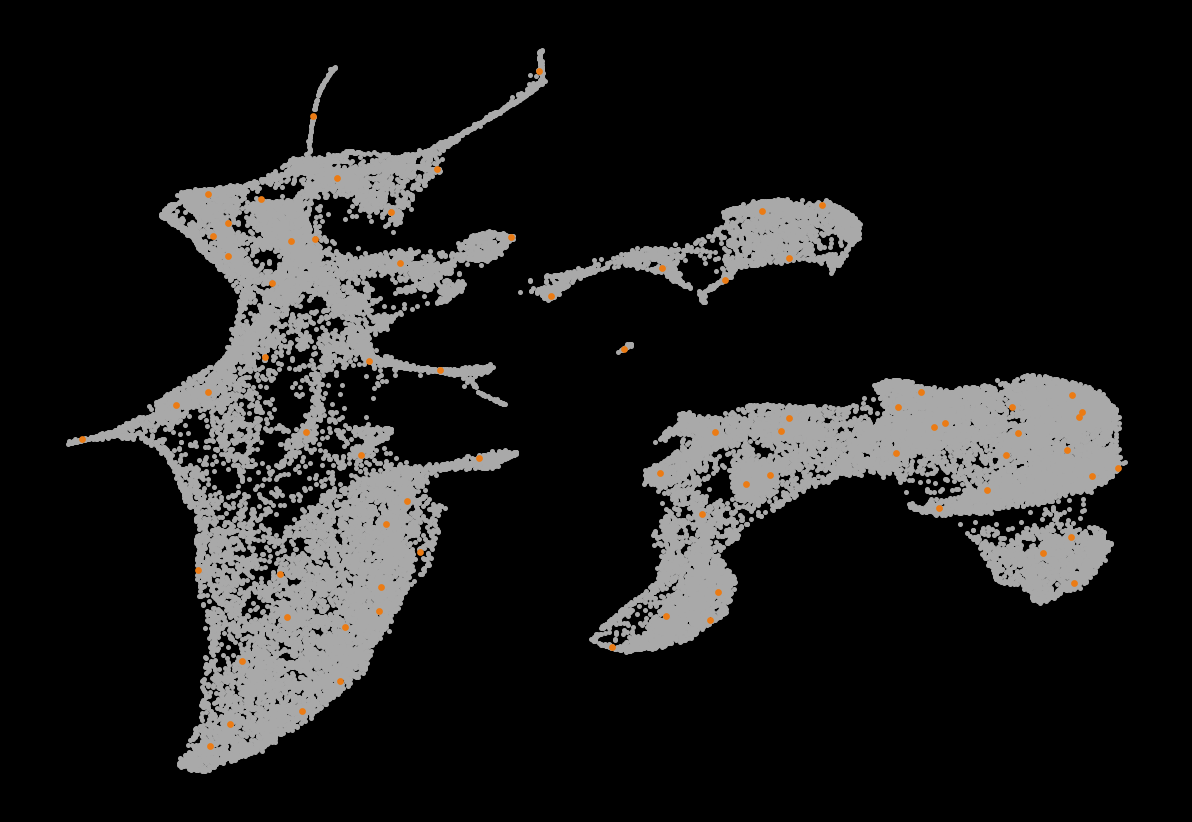

In [23]:
plt.figure(figsize=(10, 7), dpi=150)
plt.scatter(scRNA.umap[:, 0], scRNA.umap[:, 1], s=2, color="darkgrey")
plt.scatter(scRNA.umap[scRNA.knn_selected, 0],
            scRNA.umap[scRNA.knn_selected, 1], s=5,
            color="#eb7b14")

ax = plt.axes()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ax.set_frame_on(False)

Save the cells to a file

In [24]:
fname = "greenleaf_scRNA_cells_selected_from_knn.txt"
with open(fname, "w") as f:
    for c in scRNA.knn_selected:
        f.write("{0}\n".format(c))
f.close()

## 4. Select cells from scATAC-seq

Select the least similar cell to the rest of the population as a starting cell

In [33]:
S = pairwise_kernels(scATAC.umap35, metric="rbf", **{"gamma": 0.08})
start = np.argmin(np.sum(S, axis=0))

Obtain 75 dissimilar cells based on the RBF-kernel similarity in the 35D UMAP space.

In [34]:
scATAC.knn_selected = csel.from_knn_dist(scATAC.umap35, start=start, n_ret=75,
                                         metric="rbf", seed=42,
                                         metric_params={"gamma": 8})

Visualize the selected cells for a brief inspection

/home/hvlot/miniconda3/envs/hcv1/lib/python3.6/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



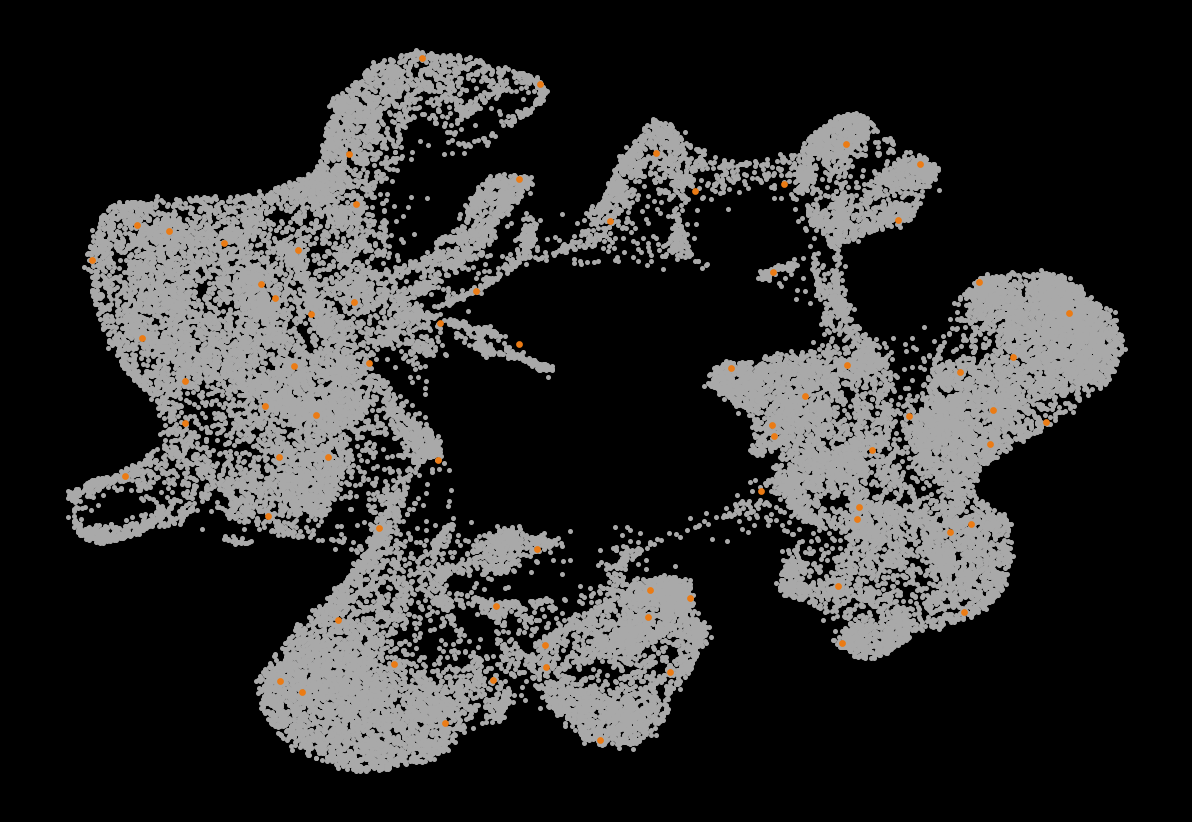

In [35]:
plt.figure(figsize=(10, 7), dpi=150)
plt.scatter(scATAC.umap[:, 0],
            scATAC.umap[:, 1], s=2, color="darkgrey")
plt.scatter(scATAC.umap[scATAC.knn_selected, 0],
            scATAC.umap[scATAC.knn_selected, 1], s=5,
            color="#eb7b14")

ax = plt.axes()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ax.set_frame_on(False)

Save the cells to a file

In [36]:
fname = "greenleaf_scATAC_cells_selected_from_knn.txt"
with open(fname, "w") as f:
    for c in scATAC.knn_selected:
        f.write("{0}\n".format(c))
f.close()

## 5. Visually select cells from the 2D scRNA-seq UMAP

Initialize the figure widget

In [16]:
f = csel.from_gui(scRNA.umap, figsize=(1000, 1000))

Visualize the figure widget and select cells

In [17]:
f

FigureWidget({
    'data': [{'marker': {'color': [#ffffff, #ffffff, #ffffff, ..., #ffffff,
                   …

Close the figure widget to speed up the process

In [24]:
f.close()

Get the selected cells from the widget object

In [22]:
scRNA.gui_selected = csel.get_cells_from_gui(f)

Visualize the selected cells to check if the selection was succesful

/home/hvlot/miniconda3/envs/hcv1/lib/python3.6/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



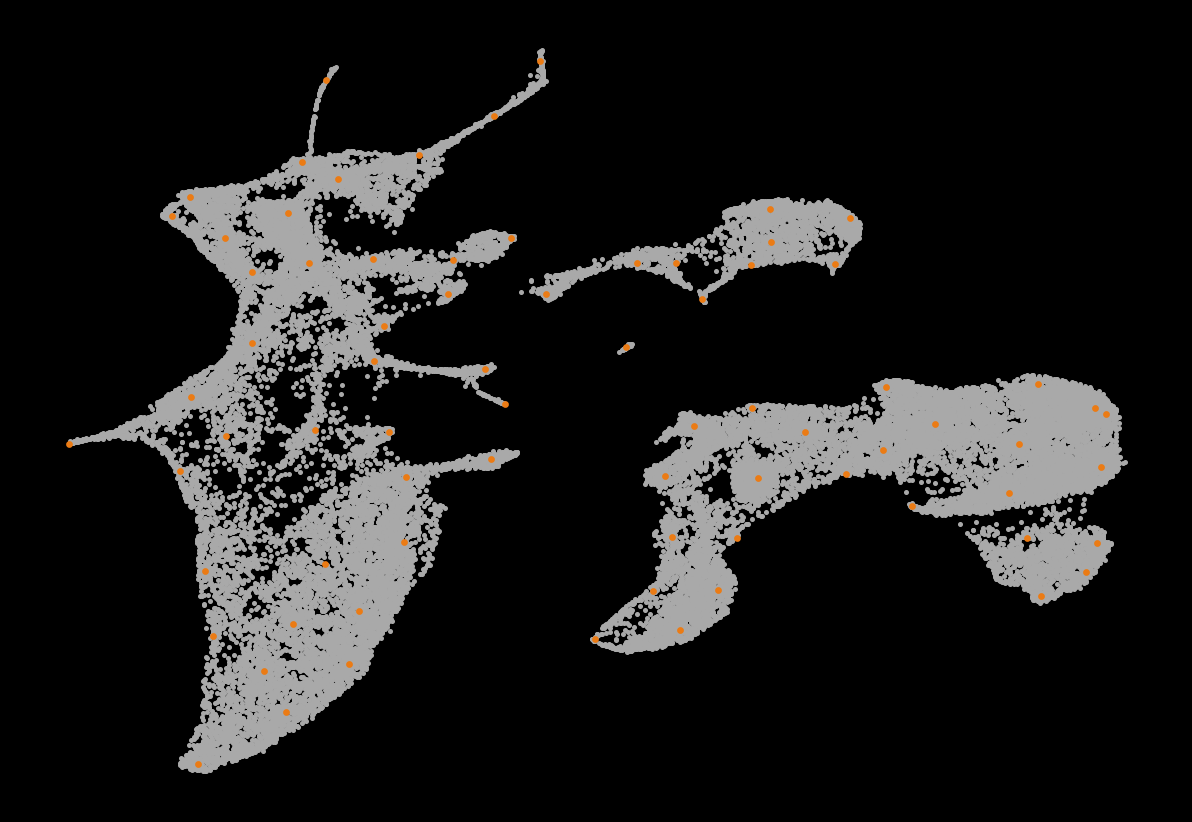

In [25]:
plt.figure(figsize=(10, 7), dpi=150)
plt.scatter(scRNA.umap[:, 0], scRNA.umap[:, 1], s=2, color="darkgrey")
plt.scatter(scRNA.umap[scRNA.gui_selected, 0],
            scRNA.umap[scRNA.gui_selected, 1], s=5,
            color="#eb7b14")

ax = plt.axes()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ax.set_frame_on(False)

Save the cells to file

In [26]:
fname = "greenleaf_scRNA_cells_selected_from_gui.txt"
with open(fname, "w") as f:
    for c in scRNA.gui_selected:
        f.write("{0}\n".format(c))
f.close()